In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dfbasics = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
dfbasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
dfbasics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [5]:
dfGenres = dfbasics[dfbasics['genres'].notnull()]
dfGenres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [6]:
dfGenres.isna().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [7]:
type(dfGenres['genres'])

pandas.core.series.Series

In [8]:
def splitNewCol(dfName, columnName):
    newColumn = []
    for val in dfName[columnName]:
        newColumn.append(val.split(","))
    return(newColumn)

In [9]:
dfGenres['genresList'] = splitNewCol(dfGenres, 'genres')

C:\Users\kekay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
dfGenres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genresList
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War","[Adventure, History, War]"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,[Drama]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,[Documentary]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,[Comedy]


In [11]:
def countNewCol(dfName, columnName):
    newCount = []
    for val in dfName[columnName]:
        newCount.append(len(val))
    return(newCount)


In [12]:
dfGenres['genresCount'] = countNewCol(dfGenres, 'genresList')
dfGenres

C:\Users\kekay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genresList,genresCount
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]",3
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]",2
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama],1
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]",2
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",3
...,...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War","[Adventure, History, War]",3
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,[Drama],1
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,[Documentary],1
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,[Comedy],1


In [13]:
dfGenres['genresCount'].unique()

array([3, 2, 1], dtype=int64)

In [14]:
len((dfGenres.loc[dfGenres['genresCount'] == 1]).index)

81358

In [15]:
data3 = len((dfGenres.loc[dfGenres['genresCount'] == 3]).index)
data2 = len((dfGenres.loc[dfGenres['genresCount'] == 2]).index)
data1 = len((dfGenres.loc[dfGenres['genresCount'] == 1]).index)

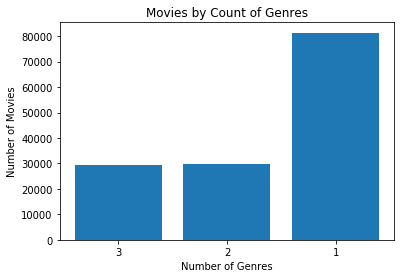

In [16]:
data = [data3, data2, data1]
labels = dfGenres['genresCount'].unique()
plt.xticks(range(len(data)), labels)
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.title('Movies by Count of Genres')
plt.bar(range(len(data)), data)
plt.show()

# Working with Genres and Finances

In [17]:
oneGenreList = dfGenres.loc[dfGenres['genresCount'] == 1]

In [18]:
oneGenreList

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genresList,genresCount
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama],1
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,[Comedy],1
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,[Biography],1
10,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,[Drama],1
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,[History],1
...,...,...,...,...,...,...,...,...
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,[Documentary],1
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,[Drama],1
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,[Documentary],1
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,[Comedy],1


In [19]:
oneGenreList['genres'].unique()

array(['Drama', 'Comedy', 'Biography', 'History', 'Documentary', 'Sci-Fi',
       'Thriller', 'Horror', 'Action', 'Adventure', 'Fantasy', 'Musical',
       'Western', 'Romance', 'Mystery', 'Crime', 'Animation', 'Family',
       'Sport', 'Music', 'News', 'Talk-Show', 'Reality-TV', 'War',
       'Game-Show'], dtype=object)

In [20]:
len(oneGenreList['genres'].unique())

25

In [34]:
%store oneGenreList

Stored 'oneGenreList' (DataFrame)


- Pulling in Finance Database from Payson

In [21]:
%store -r dftest

In [22]:
dftest.head()

,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id
'71,RAtt.,1300000.0,355000.0,2015.0,NaN,NaN,0.0,1655000.0,'71,2014.0,99.0,"Action,Drama,Thriller",7.2,46103.0,tt2614684
"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,NaN,0.0,53900.0,Tusen ganger god natt,2013.0,117.0,"Drama,War",7.1,6848.0,tt2353767
10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,54.0,"Mar 11, 2016",5000000.0,108286422.0,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",7.2,260383.0,tt1179933
10 Days in a Madhouse,NaN,14616.0,0.0,NaN,48.0,"Nov 11, 2015",12000000.0,14616.0,10 Days in a Madhouse,2015.0,111.0,Drama,6.7,1114.0,tt3453052
10 Years,Anch.,203000.0,0.0,2012.0,NaN,NaN,0.0,203000.0,10 Years,2011.0,100.0,"Comedy,Drama,Romance",6.1,22484.0,tt1715873


- Listing Genres

In [23]:
dftest['genresList'] = splitNewCol(dftest, 'genres')

In [24]:
dftest

,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id,genresList
'71,RAtt.,1300000.0,355000.0,2015.0,NaN,NaN,0.0,1.655000e+06,'71,2014.0,99.0,"Action,Drama,Thriller",7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,NaN,0.0,5.390000e+04,Tusen ganger god natt,2013.0,117.0,"Drama,War",7.1,6848.0,tt2353767,"[Drama, War]"
10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,54.0,"Mar 11, 2016",5000000.0,1.082864e+08,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
10 Days in a Madhouse,NaN,14616.0,0.0,NaN,48.0,"Nov 11, 2015",12000000.0,1.461600e+04,10 Days in a Madhouse,2015.0,111.0,Drama,6.7,1114.0,tt3453052,[Drama]
10 Years,Anch.,203000.0,0.0,2012.0,NaN,NaN,0.0,2.030000e+05,10 Years,2011.0,100.0,"Comedy,Drama,Romance",6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoom,NaN,11989328.0,516860.0,NaN,26.0,"Aug 11, 2006",35000000.0,1.250619e+07,Zoom,2016.0,NaN,"Crime,Thriller",NaN,NaN,tt6117454,"[Crime, Thriller]"
Zoom,NaN,11989328.0,516860.0,NaN,26.0,"Aug 11, 2006",35000000.0,1.250619e+07,Zoom,2016.0,NaN,Horror,5.4,17.0,tt6667868,[Horror]
Zootopia,BV,341300000.0,682500000.0,2016.0,57.0,"Mar 4, 2016",150000000.0,1.019430e+09,Zootopia,2016.0,108.0,"Adventure,Animation,Comedy",8.0,383446.0,tt2948356,"[Adventure, Animation, Comedy]"
Zulu,NaN,0.0,1844228.0,NaN,82.0,"Dec 31, 2013",16000000.0,1.844228e+06,Zulu,2013.0,110.0,"Crime,Drama,Thriller",6.7,16607.0,tt2249221,"[Crime, Drama, Thriller]"


In [25]:
dfNew = dftest.drop(['id'], axis = 1)

In [26]:
dfNew

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id,genresList
'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1.655000e+06,'71,2014.0,99.0,"Action,Drama,Thriller",7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,5.390000e+04,Tusen ganger god natt,2013.0,117.0,"Drama,War",7.1,6848.0,tt2353767,"[Drama, War]"
10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,1.082864e+08,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,1.461600e+04,10 Days in a Madhouse,2015.0,111.0,Drama,6.7,1114.0,tt3453052,[Drama]
10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,2.030000e+05,10 Years,2011.0,100.0,"Comedy,Drama,Romance",6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoom,NaN,11989328.0,516860.0,NaN,"Aug 11, 2006",35000000.0,1.250619e+07,Zoom,2016.0,NaN,"Crime,Thriller",NaN,NaN,tt6117454,"[Crime, Thriller]"
Zoom,NaN,11989328.0,516860.0,NaN,"Aug 11, 2006",35000000.0,1.250619e+07,Zoom,2016.0,NaN,Horror,5.4,17.0,tt6667868,[Horror]
Zootopia,BV,341300000.0,682500000.0,2016.0,"Mar 4, 2016",150000000.0,1.019430e+09,Zootopia,2016.0,108.0,"Adventure,Animation,Comedy",8.0,383446.0,tt2948356,"[Adventure, Animation, Comedy]"
Zulu,NaN,0.0,1844228.0,NaN,"Dec 31, 2013",16000000.0,1.844228e+06,Zulu,2013.0,110.0,"Crime,Drama,Thriller",6.7,16607.0,tt2249221,"[Crime, Drama, Thriller]"


In [27]:
dfNew = dfNew.drop(['genres'], axis = 1)

In [28]:
dfNew

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList
'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1.655000e+06,'71,2014.0,99.0,7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,5.390000e+04,Tusen ganger god natt,2013.0,117.0,7.1,6848.0,tt2353767,"[Drama, War]"
10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,1.082864e+08,10 Cloverfield Lane,2016.0,103.0,7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,1.461600e+04,10 Days in a Madhouse,2015.0,111.0,6.7,1114.0,tt3453052,[Drama]
10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,2.030000e+05,10 Years,2011.0,100.0,6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoom,NaN,11989328.0,516860.0,NaN,"Aug 11, 2006",35000000.0,1.250619e+07,Zoom,2016.0,NaN,NaN,NaN,tt6117454,"[Crime, Thriller]"
Zoom,NaN,11989328.0,516860.0,NaN,"Aug 11, 2006",35000000.0,1.250619e+07,Zoom,2016.0,NaN,5.4,17.0,tt6667868,[Horror]
Zootopia,BV,341300000.0,682500000.0,2016.0,"Mar 4, 2016",150000000.0,1.019430e+09,Zootopia,2016.0,108.0,8.0,383446.0,tt2948356,"[Adventure, Animation, Comedy]"
Zulu,NaN,0.0,1844228.0,NaN,"Dec 31, 2013",16000000.0,1.844228e+06,Zulu,2013.0,110.0,6.7,16607.0,tt2249221,"[Crime, Drama, Thriller]"


In [29]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5170 entries, '71 to xXx: Return of Xander Cage
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studio             3348 non-null   object 
 1   domestic_gross     5170 non-null   float64
 2   foreign_gross      5170 non-null   float64
 3   year               3351 non-null   float64
 4   release_date       3395 non-null   object 
 5   production_budget  5170 non-null   float64
 6   worldwide_gross    5170 non-null   float64
 7   original_title     5170 non-null   object 
 8   start_year         5170 non-null   float64
 9   runtime_minutes    4718 non-null   float64
 10  averagerating      4236 non-null   float64
 11  numvotes           4236 non-null   float64
 12  movie_id           5170 non-null   object 
 13  genresList         5170 non-null   object 
dtypes: float64(9), object(5)
memory usage: 605.9+ KB


- next step

In [30]:
dfNew.loc[dfNew['genresList'] == 'Action']

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList


In [31]:
type(dfNew['genresList'])

pandas.core.series.Series

In [32]:
dfGenreFin = dfNew.reset_index()

In [33]:
%store dfGenreFin

Stored 'dfGenreFin' (DataFrame)


In [44]:
dfGenreFin

,index,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList
0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1.655000e+06,'71,2014.0,99.0,7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,5.390000e+04,Tusen ganger god natt,2013.0,117.0,7.1,6848.0,tt2353767,"[Drama, War]"
2,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,1.082864e+08,10 Cloverfield Lane,2016.0,103.0,7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
3,10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,1.461600e+04,10 Days in a Madhouse,2015.0,111.0,6.7,1114.0,tt3453052,[Drama]
4,10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,2.030000e+05,10 Years,2011.0,100.0,6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,Zoom,NaN,11989328.0,516860.0,NaN,"Aug 11, 2006",35000000.0,1.250619e+07,Zoom,2016.0,NaN,NaN,NaN,tt6117454,"[Crime, Thriller]"
5166,Zoom,NaN,11989328.0,516860.0,NaN,"Aug 11, 2006",35000000.0,1.250619e+07,Zoom,2016.0,NaN,5.4,17.0,tt6667868,[Horror]
5167,Zootopia,BV,341300000.0,682500000.0,2016.0,"Mar 4, 2016",150000000.0,1.019430e+09,Zootopia,2016.0,108.0,8.0,383446.0,tt2948356,"[Adventure, Animation, Comedy]"
5168,Zulu,NaN,0.0,1844228.0,NaN,"Dec 31, 2013",16000000.0,1.844228e+06,Zulu,2013.0,110.0,6.7,16607.0,tt2249221,"[Crime, Drama, Thriller]"


In [ ]:
for val in df['genresList']:
    val_index = 0
    len(val)

In [49]:
len(df['genresList'][0])

3

In [63]:
len(df['genresList'])

5170

# Gross per Genre

In [103]:
for val in df['genresList']:
    if any('Action' in g for g in val):
        print(val)

['Action', 'Drama', 'Thriller']
['Action', 'Drama', 'Romance']
['Action', 'Drama', 'History']
['Action', 'Adventure', 'Drama']
['Action', 'History', 'Thriller']
['Action', 'Adventure', 'Drama']
['Action', 'Comedy', 'Crime']
['Action', 'Comedy', 'Crime']
['Action', 'Crime', 'Drama']
['Action', 'Comedy', 'Crime']
['Action', 'Drama', 'Thriller']
['Action', 'Comedy', 'Crime']
['Action', 'Fantasy', 'War']
['Action', 'Adventure', 'Drama']
['Action', 'Drama', 'War']
['Action', 'Drama', 'History']
['Action', 'Comedy']
['Action', 'Thriller']
['Action', 'Drama', 'War']
['Action', 'Drama', 'History']
['Action', 'Crime', 'Drama']
['Action', 'Comedy', 'Drama']
['Action', 'Mystery', 'Thriller']
['Action', 'Comedy', 'Drama']
['Action', 'Sci-Fi']
['Action', 'Fantasy', 'Horror']
['Action', 'Adventure', 'Drama']
['Action', 'Thriller']
['Action']
['Action', 'Adventure', 'Biography']
['Action', 'Adventure', 'Biography']
['Action', 'Adventure', 'Drama']
['Action', 'Adventure', 'Thriller']
['Action', 'Drama

In [113]:
list = zip(df['genresList'], df['domestic_gross'])
for val in list:
    print(val)

(['Action', 'Drama', 'Thriller'], 1300000.0)
(['Drama', 'War'], 53900.0)
(['Drama', 'Horror', 'Mystery'], 72100000.0)
(['Drama'], 14616.0)
(['Comedy', 'Drama', 'Romance'], 203000.0)
(['Drama'], 11000.0)
(['Comedy', 'Drama'], 1300000.0)
(['Horror', 'Mystery', 'Thriller'], 32800.0)
(['Action', 'Drama', 'Romance'], 12234694.0)
(['Action', 'Drama', 'History'], 45800000.0)
(['Biography', 'Drama', 'History'], 56700000.0)
(['Adventure', 'Biography', 'Drama'], 18300000.0)
(['Action', 'Adventure', 'Drama'], 803000.0)
(['Horror', 'Thriller'], 13800.0)
(['Action', 'History', 'Thriller'], 0.0)
(['Drama'], 15100.0)
(['Action', 'Adventure', 'Drama'], 136000.0)
(['Comedy'], 5800.0)
(['Comedy', 'Drama', 'Romance'], 633000.0)
(['Action', 'Comedy', 'Crime'], 75600000.0)
(['Comedy', 'Drama', 'Romance'], 2200000.0)
(['Documentary', 'Music'], 4900000.0)
(['Documentary', 'Drama', 'Music'], 280000.0)
(['Comedy', 'Drama'], 5700000.0)
(['Horror'], 81159365.0)
(['Action', 'Comedy', 'Crime'], 138400000.0)
(['Act

(['Biography', 'Documentary'], 426000.0)
(['Drama'], 17700.0)
(['Drama', 'History', 'War'], 6500000.0)
(['Comedy', 'Romance'], 148400000.0)
(['Comedy', 'Romance'], 990000.0)
(['Comedy'], 58636047.0)
(['Horror', 'Thriller'], 4595000.0)
(['Comedy', 'Drama'], 206000.0)
(['Drama', 'Romance'], 50003303.0)
(['Drama', 'Family'], 50003303.0)
(['Drama', 'War'], 35400000.0)
(['Action', 'Crime', 'Drama'], 10378555.0)
(['Drama'], 1400000.0)
(['Thriller'], 3496.0)
(['Action', 'Sci-Fi', 'Thriller'], 14300000.0)
(['Comedy', 'Drama', 'Family'], 226277068.0)
(['Action', 'Drama', 'Sci-Fi'], 226277068.0)
(['Comedy', 'Crime', 'Drama'], 27800000.0)
(['Comedy'], 253000.0)
(['Documentary'], 24100.0)
(['Comedy'], 24100.0)
(['Crime', 'Drama'], 16100.0)
(['Crime', 'Mystery', 'Thriller'], 252676.0)
(['Action', 'Thriller'], 62500000.0)
(['Action', 'Biography', 'Drama'], 125100000.0)
(['Comedy', 'Romance'], 30202860.0)
(['Biography', 'Documentary'], 30202860.0)
(['Action', 'Crime', 'Drama'], 66500000.0)
(['Drama',

(['Documentary'], 177000.0)
(['Action', 'Drama'], 5300.0)
(['Comedy', 'Drama'], 37100000.0)
(['Action', 'Crime', 'Drama'], 10700000.0)
(['Western'], 10700000.0)
(['Horror'], 13900.0)
(['Biography', 'Drama', 'Sport'], 442638.0)
(['Action', 'Adventure', 'Documentary'], 442638.0)
(['Drama', 'Romance', 'Thriller'], 2000000.0)
(['Comedy', 'Mystery'], 254500000.0)
(['Adventure', 'Comedy', 'Crime'], 112200000.0)
(['Biography', 'Drama'], 466000.0)
(['Action', 'Comedy', 'Crime'], 20700000.0)
(['Documentary'], 3709.0)
(['Crime', 'Drama'], 29700000.0)
(['Crime', 'Drama', 'Mystery'], 54100000.0)
(['Action', 'Comedy', 'Crime'], 159600000.0)
(['Drama'], 169700000.0)
(['Animation', 'Family'], 32200.0)
(['Adventure', 'Biography', 'Drama'], 697000.0)
(['Drama', 'Romance', 'War'], 0.0)
(['Action', 'Comedy', 'Thriller'], 75500000.0)
(['Crime', 'Documentary', 'Drama'], 7164995.0)
(['Adventure', 'Family', 'Fantasy'], 303000000.0)
(['Adventure', 'Fantasy'], 255100000.0)
(['Adventure', 'Fantasy'], 258399999.

In [114]:
for i in df.index:
    print(df['genresList'][i], df['domestic_gross'][i])

['Action', 'Drama', 'Thriller'] 1300000.0
['Drama', 'War'] 53900.0
['Drama', 'Horror', 'Mystery'] 72100000.0
['Drama'] 14616.0
['Comedy', 'Drama', 'Romance'] 203000.0
['Drama'] 11000.0
['Comedy', 'Drama'] 1300000.0
['Horror', 'Mystery', 'Thriller'] 32800.0
['Action', 'Drama', 'Romance'] 12234694.0
['Action', 'Drama', 'History'] 45800000.0
['Biography', 'Drama', 'History'] 56700000.0
['Adventure', 'Biography', 'Drama'] 18300000.0
['Action', 'Adventure', 'Drama'] 803000.0
['Horror', 'Thriller'] 13800.0
['Action', 'History', 'Thriller'] 0.0
['Drama'] 15100.0
['Action', 'Adventure', 'Drama'] 136000.0
['Comedy'] 5800.0
['Comedy', 'Drama', 'Romance'] 633000.0
['Action', 'Comedy', 'Crime'] 75600000.0
['Comedy', 'Drama', 'Romance'] 2200000.0
['Documentary', 'Music'] 4900000.0
['Documentary', 'Drama', 'Music'] 280000.0
['Comedy', 'Drama'] 5700000.0
['Horror'] 81159365.0
['Action', 'Comedy', 'Crime'] 138400000.0
['Action', 'Crime', 'Drama'] 0.0
['Action', 'Comedy', 'Crime'] 191700000.0
['Drama',

['Thriller'] 2000000.0
['Drama'] 31011616.0
['Drama', 'Romance'] 18100000.0
['Drama'] 3600000.0
['Biography', 'Drama'] 35300.0
['Drama', 'War'] 13300.0
['Biography', 'Comedy', 'Crime'] 8800000.0
['Adventure', 'Drama', 'Thriller'] 8500.0
['Biography', 'Comedy', 'Drama'] 6400000.0
['Drama'] 1700000.0
['Documentary', 'History', 'News'] 102000.0
['Drama'] 102000.0
['Documentary', 'News'] 102000.0
['Action', 'Adventure', 'Sci-Fi'] 408100000.0
['Action', 'Adventure', 'Sci-Fi'] 176700000.0
['Action', 'Adventure', 'Sci-Fi'] 259800000.0
['Comedy', 'Drama'] 5900000.0
['Action', 'Adventure', 'Sci-Fi'] 426525952.0
['Biography', 'Drama', 'Thriller'] 107100000.0
['Action', 'Animation', 'Comedy'] 73900000.0
['Drama', 'Thriller'] 2583301.0
['Action', 'Thriller'] 2583301.0
['Action', 'Crime', 'Drama'] 2583301.0
['Drama'] 2583301.0
['Sci-Fi', 'Thriller'] 5958315.0
['Drama'] 6700.0
['Adventure', 'Animation', 'Comedy'] 6700.0
['Crime', 'Drama', 'Romance'] 85500.0
['Drama'] 0.0
['Drama', 'Horror', 'Sci-Fi'

['Biography', 'Drama', 'Sport'] 12100000.0
['Mystery'] 619000.0
['Drama'] 619000.0
['Drama'] 13110448.0
['Comedy', 'Drama', 'Romance'] 4099999.0
['Drama', 'History'] 307000.0
['Comedy', 'Drama', 'Music'] 645000.0
['Drama'] 645000.0
['Drama'] 645000.0
['Drama'] 22006296.0
['Drama', 'Horror'] 22006296.0
['Horror', 'Sci-Fi', 'Thriller'] 22006296.0
['Animation', 'Comedy', 'Family'] 35300000.0
['Drama', 'History', 'Romance'] 881000.0
['Documentary'] 101000.0
['Comedy', 'Horror', 'Sci-Fi'] 70958.0
['Adventure', 'Animation', 'Comedy'] 55800000.0
['Action', 'Comedy', 'Crime'] 1800000.0
['Drama', 'History', 'Romance'] 53800.0
['Documentary'] 53800.0
['Documentary', 'Sport'] 17500000.0
['Action', 'Biography', 'Drama'] 20800000.0
['Crime', 'Drama', 'Thriller'] 0.0
['Documentary'] 0.0
['Drama'] 0.0
['Documentary'] 0.0
['Drama', 'Music'] 0.0
['Action', 'Comedy'] 0.0
['Drama'] 0.0
['Drama'] 0.0
['Documentary'] 0.0
['Drama'] 0.0
['Horror'] 0.0
['Drama'] 0.0
['Biography', 'Crime', 'Documentary'] 0.0
[

['Adventure', 'Animation'] 0.0
['Action', 'Adventure', 'Sci-Fi'] 47400000.0
['Action', 'Adventure', 'Sci-Fi'] 652300000.0
['Action', 'Adventure', 'Sci-Fi'] 417700000.0
['Action', 'Comedy'] 6100000.0
['Drama'] 11400.0
['Comedy'] 17326650.0
['Comedy', 'Romance', 'Sport'] 21500000.0
['Sci-Fi'] 78000.0
['Drama', 'Romance'] 75500.0
['Action', 'Adventure', 'Fantasy'] 229000000.0
['Documentary', 'Music'] 73000000.0
['Action', 'Crime', 'Drama'] 3900000.0
['Comedy', 'Mystery', 'Romance'] 119000.0
['Drama', 'Mystery'] 32200.0
['Romance'] 4109095.0
['Comedy', 'Drama', 'Family'] 204000.0
['Adventure', 'Comedy', 'Family'] 0.0
['Drama', 'Mystery', 'Thriller'] 286000.0
['Comedy', 'Drama'] 182000.0
['Comedy', 'Drama', 'Romance'] 365000.0
['Documentary', 'Music'] 25300000.0
['Action', 'Comedy', 'Crime'] 20600000.0
['Drama', 'Romance'] 901000.0
['Action'] 2800000.0
['Documentary'] 2800000.0
['Drama', 'Romance'] 246000.0
['Action', 'Comedy'] 14900000.0
['Comedy'] 0.0
['Comedy', 'Documentary'] 7706436.0
[

['Drama'] 52302978.0
['Drama'] 52302978.0
['Comedy'] 16521410.0
['Documentary'] 5500.0
['Crime', 'Drama', 'Thriller'] 5500.0
['Drama'] 41596251.0
['Drama'] 101000.0
['Thriller'] 2844379.0
['Drama'] 2844379.0
['Drama'] 2844379.0
['Horror', 'Mystery', 'Thriller'] 50900000.0
['Drama', 'Horror', 'Mystery'] 35100000.0
['Drama'] 23200.0
['Comedy', 'Romance'] 20300000.0
['Comedy', 'Drama'] 24800000.0
['Crime', 'Drama', 'Thriller'] 3200000.0
['Documentary', 'Musical'] 100000.0
['Drama', 'Family'] 468000.0
['Documentary'] 507000.0
['Sport'] 37562568.0
['Documentary'] 37562568.0
['Drama', 'Mystery', 'Thriller'] 41083108.0
['Action', 'Drama', 'Sci-Fi'] 41083108.0
['Comedy', 'Drama'] 728.0
['Horror', 'Thriller'] 419428.0
['Crime', 'Drama', 'Thriller'] 11300000.0
['War'] 67823573.0
['Comedy'] 0.0
['Comedy', 'Romance'] 50316123.0
['Action', 'Thriller'] 7800.0
['Action', 'Adventure', 'Horror'] 21700000.0
['Adventure', 'Family', 'Fantasy'] 234770996.0
['Action', 'Adventure', 'Sci-Fi'] 101800000.0
['Ac

['Action', 'Drama', 'Thriller'] 10324441.0
['Drama'] 10400.0
['Thriller'] 10400.0
['Comedy'] 10400.0
['Crime', 'Drama', 'Mystery'] 10400.0
['Drama'] 85300000.0
['Biography', 'Drama'] 4200000.0
['Drama'] 4200000.0
['Action', 'Sport'] 4200000.0
['Comedy', 'Drama'] 67505.0
['Documentary'] 67505.0
['Drama', 'Musical'] 67505.0
['Comedy', 'Drama'] 67505.0
['Comedy', 'Drama'] 67505.0
['Comedy'] 67505.0
['Comedy'] 67505.0
['Drama'] 67505.0
['Comedy', 'Drama', 'Romance'] 670000.0
['Comedy', 'Drama', 'Romance'] 468000.0
['Comedy', 'Crime', 'Drama'] 5800000.0
['Action', 'Adventure', 'Fantasy'] 36400000.0
['Biography', 'Drama', 'History'] 4700000.0
['Drama', 'Horror', 'Sci-Fi'] 178095.0
['Action', 'Adventure', 'Fantasy'] 325100000.0
['Biography', 'Drama'] 125100000.0
['Drama', 'Romance'] 6200000.0
['Action', 'Drama', 'Sport'] 6200000.0
['Drama', 'Family'] 186000.0
['Drama'] 410919.0
['Drama'] 410919.0
['Comedy'] 410919.0
['Drama'] 410919.0
['Drama', 'Romance'] 410919.0
['Crime', 'Drama'] 410919.0


['Documentary'] 1300000.0
['Comedy', 'Drama', 'Romance'] 9196278.0
['Mystery', 'Romance', 'Thriller'] 6000000.0
['Action', 'Adventure', 'Western'] 89300000.0
['Thriller'] 130000.0
['Drama', 'Romance'] 37400000.0
['Biography', 'Comedy', 'Drama'] 21300.0
['Comedy'] 21300.0
['Biography', 'Documentary', 'History'] 109000.0
['Fantasy'] 1711.0
['Drama', 'Music'] 1711.0
['Horror', 'Thriller'] 1165881.0
['Action', 'Adventure', 'Crime'] 23600000.0
['Drama'] 23600000.0
['Adventure', 'Biography', 'Drama'] 8600000.0
['Adventure', 'Family', 'Fantasy'] 549632.0
['Adventure', 'Documentary'] 8322608.0
['Comedy'] 267000.0
['Action', 'Adventure', 'Romance'] 0.0
['Comedy', 'Drama', 'Romance'] 0.0
['Drama', 'Romance'] 60500000.0
['Drama', 'Thriller'] 266967.0
['Drama', 'Romance'] 4200000.0
['Documentary'] 102000.0
['Comedy', 'Drama', 'Fantasy'] 102000.0
['Comedy', 'Drama'] 102000.0
['Action', 'Adventure', 'Western'] 93432655.0
['Drama'] 8330720.0
['Drama'] 8330720.0
['Biography', 'Comedy', 'Drama'] 570000

['Drama'] 65532576.0
['Western'] 65532576.0
['Thriller'] 65532576.0
['Drama'] 65532576.0
['Action', 'Crime', 'Drama'] 65011757.0
['Drama', 'Family'] 65011757.0
['Crime', 'Drama', 'Thriller'] 65011757.0
['Documentary'] 65011757.0
['Drama', 'Horror'] 65011757.0
['Drama'] 65011757.0
['Horror'] 65011757.0
['Action', 'Thriller', 'War'] 65011757.0
['Adventure', 'Drama'] 211000.0
['Action', 'Drama', 'Thriller'] 2700000.0
['Action', 'Fantasy', 'Horror'] 12100.0
['Drama', 'Sport'] 12100.0
['Biography', 'Drama', 'History'] 33299999.0
['Drama'] 5300000.0
['Sport'] 5300000.0
['Drama', 'Family'] 132400000.0
['Crime', 'Thriller'] 19389454.0
['Adventure', 'Animation', 'Comedy'] 45216793.0
['Drama'] 1400000.0
['Action', 'Adventure', 'Fantasy'] 412600000.0
['Sci-Fi'] 412600000.0
['Documentary', 'Drama', 'Sport'] 412600000.0
['Fantasy', 'Horror', 'Sci-Fi'] 1060512.0
['Drama'] 1060512.0
['Adventure', 'Fantasy', 'Horror'] 1060512.0
['Comedy'] 1060512.0
['Comedy', 'Drama'] 1060512.0
['Crime', 'Drama', 'Mys

In [126]:
def action():
    gross = 0
    for i in df.index:
        if any('Action' in g for g in df['genresList'][i]):
            gross += (df['domestic_gross'][i])
    return(gross)

In [127]:
print(action())

50530500665.0


In [129]:
def gross(keyword):
    gross = 0
    for i in df.index:
        if any(keyword in g for g in df['genresList'][i]):
            gross += (df['domestic_gross'][i])
    return(gross)

In [130]:
print(gross('Drama'))

54733162872.0


In [131]:
print(gross('Comedy'))

42160927356.0


In [132]:
print(gross('Romance'))

11462899778.0


# Genre Count

In [133]:
def count(keyword):
    count = 0
    for i in df.index:
        if any(keyword in g for g in df['genresList'][i]):
            count += 1
    return(count)

In [134]:
print(count('Action'))

935


In [135]:
print(count('Drama'))

2773


In [136]:
print(count('Comedy'))

1266


In [137]:
print(count('Romance'))

639


# Mean Gross

In [147]:
def meanGross(keyword):
    genreGross = gross(keyword)
    genreCount = count(keyword)
    mean = genreGross/genreCount
    return mean

In [148]:
meanGross('Action')

54043316.219251335

# Production Budget

In [145]:
def budget(keyword):
    budget = 0
    for i in df.index:
        if any(keyword in g for g in df['genresList'][i]):
            budget += (df['production_budget'][i])
    return(budget)

In [146]:
budget('Action')

43698442311.0

# Mean Production Budget

In [149]:
def meanBudget(keyword):
    genreBudget = budget(keyword)
    genreCount = count(keyword)
    mean = genreBudget/genreCount
    return mean

In [150]:
meanBudget('Action')

46736301.936898395

# Rate of Return

In [157]:
def returnRate(keyword):
    gross = meanGross(keyword)
    budget = meanBudget(keyword)
    increase = gross - budget
    returnRate = (increase/budget) * 100
    return returnRate

In [158]:
returnRate('Action')

15.634558104786716

Multiply percentage by production budget, take that and add to production budget to get gross?